# Expected Matching Approach – Simulation Benchmark

### Goals
- Reproduce example scenarios.
- Test relevant matching policies and compare them to the **EMA Rotation** matching strategy.
- Evaluate which teams qualify with respect to **true skill level** and **a priori seeding**.

### Tool
**RSTT**, a Python framework for simulation-based research that I developed.

### Comparative Study
We conduct a comparative study of different matching policies, algorithms, or pairing systems.  
The evaluation is performed across a **configuration matrix** defined by three factors:  

1. **Solver** rsst.LogSolver()  
2. **Population** skills distribution model (Gaussian, pareto, weibull, and Real team Elo infered level)  
3. **Seeding Class** permutation applied to 

This results in **16 experimental configurations**, covering all combinations of these factors. Each configuration is tested to assess system performance, fairness, and robustness.


In [1]:
import pandas as pd

from rstt import BasicPlayer, BTRanking, BetterWin, SwissBracket
from simulation.bracketframe import bracketFrame

## 1.Reproduction

We load a csv containing the game results of the twitter exmaple. We create rstt.Player instance to represent each involved teams. A level is assigned to each team according to their seed, ensuring that high seed have higher level.

In [2]:
example = pd.read_csv('data/examples/graham_pit_example.csv', index_col=0, keep_default_na=False)
names = example['Team'].values
levels = [(16-i)*100 for i in range(0,16)]
teams = [BasicPlayer(name, level) for name, level in zip(names, levels)]
seeds = BTRanking('Seedings', teams)
seeds.plot()

----------- Seedings -----------
   0.               Heroic       1600
   1.               Cloud9       1500
   2.               Spirit       1400
   3.                  BIG       1300
   4.                 Ence       1200
   5.             Vitality       1100
   6.                  NIP       1000
   7.                 9INE        900
   8.                   G2        800
   9.         Eternal Fire        700
  10.             Astralis        600
  11.                Monte        500
  12.              iNation        400
  13.               Aurora        300
  14.                Forze        200
  15.             Team 500        100


The following cells represent various run of the format with the **BetterWin()** solver, which assign game result determiniticly - the player with the highest level wins.

### 1.1 Default implementation

The rstt package provides a SwissBracket class for the tournament under study. However, its default implementation does not emulate the example, furthermore a duplice game is produced: **Ence versus G2** played in $Round_3$ and $Round_5$.


In [3]:
sb = SwissBracket('SeededChord_x', seeds, BetterWin())
sb.registration(teams)
sb.run()
sb_df = bracketFrame(sb)
sb_df

/Users/dbucher/Documents/GitHub/SwissBracketMatching/.venv/lib/python3.13/site-packages/rstt/utils/competition.py:46: RuntimeWarning: No Valid matchups where found
  warnings.warn(msg, RuntimeWarning)


,Team,Seed,Round 1,Round 2,Round 3,Round 4,Round 5
Heroic,Heroic,1,Team 500 - win,9INE - win,BIG - win,,
Cloud9,Cloud9,2,Forze - win,NIP - win,Spirit - win,,
Spirit,Spirit,3,Aurora - win,Vitality - win,Cloud9 - lose,Ence - win,
BIG,BIG,4,iNation - win,Ence - win,Heroic - lose,9INE - win,
Ence,Ence,5,Monte - win,BIG - lose,G2 - win,Spirit - lose,G2 - win
Vitality,Vitality,6,Astralis - win,Spirit - lose,Eternal Fire - win,NIP - win,
NIP,NIP,7,Eternal Fire - win,Cloud9 - lose,Astralis - win,Vitality - lose,Monte - win
9INE,9INE,8,G2 - win,Heroic - lose,Monte - win,BIG - lose,Astralis - win
G2,G2,9,9INE - lose,Team 500 - win,Ence - lose,Eternal Fire - win,Ence - lose
Eternal Fire,Eternal Fire,10,NIP - lose,Forze - win,Vitality - lose,G2 - lose,


### 1.2 Example Reproduction

I provide a class reproducing the target example results.

In [4]:
from simulation.systems.csmajor import GrahamPittExample

gpp = GrahamPittExample('GPP', seeds, BetterWin())
gpp.run()

gpp_df = bracketFrame(gpp)

if example.equals(gpp_df):
    print("Simulation reproduces the example !")

gpp_df

Simulation reproduces the example !


,Team,Seed,Round 1,Round 2,Round 3,Round 4,Round 5
Heroic,Heroic,1,Team 500 - win,9INE - win,BIG - win,,
Cloud9,Cloud9,2,Forze - win,NIP - win,Spirit - win,,
Spirit,Spirit,3,Aurora - win,Vitality - win,Cloud9 - lose,Ence - win,
BIG,BIG,4,iNation - win,Ence - win,Heroic - lose,Vitality - win,
Ence,Ence,5,Monte - win,BIG - lose,Astralis - win,Spirit - lose,G2 - win
Vitality,Vitality,6,Astralis - win,Spirit - lose,Monte - win,BIG - lose,9INE - win
NIP,NIP,7,Eternal Fire - win,Cloud9 - lose,G2 - win,9INE - win,
9INE,9INE,8,G2 - win,Heroic - lose,Eternal Fire - win,NIP - lose,Vitality - lose
G2,G2,9,9INE - lose,Team 500 - win,NIP - lose,Eternal Fire - win,Ence - lose
Eternal Fire,Eternal Fire,10,NIP - lose,Forze - win,9INE - lose,G2 - lose,


### 1.3 Current Major format

I provide another class enforcing Valve's rule, which matches the proposal of GrahmaPitt. It uses speedup pairings in the first round. It uses the solkoff tiebreaker policy.

As we can see, in the Example reproduction Astralis does qualify beating Monte in place of 9INE who lost against Vitality. And in the new rules, the top8 seed to indeed qualify.

We have classes ready for comparative study.

In [5]:
from rstt.utils import utils as uu, matching as um, competition as uc
from simulation.systems.csmajor import GrahamPittSolution

gps = GrahamPittSolution('GPS', seeds, BetterWin())
gps.run()
gps_df = bracketFrame(gps)
gps_df

,Team,Seed,Round 1,Round 2,Round 3,Round 4,Round 5
Heroic,Heroic,1,G2 - win,9INE - win,BIG - win,,
Cloud9,Cloud9,2,Eternal Fire - win,NIP - win,Spirit - win,,
Spirit,Spirit,3,Astralis - win,Vitality - win,Cloud9 - lose,9INE - win,
BIG,BIG,4,Monte - win,Ence - win,Heroic - lose,NIP - win,
Ence,Ence,5,iNation - win,BIG - lose,Monte - win,Vitality - win,
Vitality,Vitality,6,Aurora - win,Spirit - lose,Astralis - win,Ence - lose,Eternal Fire - win
NIP,NIP,7,Forze - win,Cloud9 - lose,Eternal Fire - win,BIG - lose,G2 - win
9INE,9INE,8,Team 500 - win,Heroic - lose,G2 - win,Spirit - lose,Astralis - win
G2,G2,9,Heroic - lose,Team 500 - win,9INE - lose,Aurora - win,NIP - lose
Eternal Fire,Eternal Fire,10,Cloud9 - lose,Forze - win,NIP - lose,iNation - win,Vitality - lose


### 1.4 Optimized Default

Here is a glimpse on how to parametrize the SwissBracket class.
To qualify the top8 with minimal intervention, we can simply specify a different game generot for the last round - the round where teams with *2 wins and 2 loses* face each others. We also need to tell the tournament to always use the initial seeds for every round and not just the initial one.

In [6]:
from simulation.systems.csmajor import Chord6

class InitialSeeds:
    def seed(self, players, initial_seeds, results, *args, **kwargs):
        return [p for p in initial_seeds if p in players]

class SeededChord(SwissBracket):
    def __init__(self, name, seeding, solver):
        super().__init__(name, seeding, solver,
                         def_seeder=InitialSeeds()
                        )
        self.generators[(2,2)] = Chord6()

sc = SeededChord('SeededChord_x', seeds, BetterWin())
sc.registration(teams)
sc.run()
sc_df = bracketFrame(sc)
sc_df

,Team,Seed,Round 1,Round 2,Round 3,Round 4,Round 5
Heroic,Heroic,1,Team 500 - win,9INE - win,BIG - win,,
Cloud9,Cloud9,2,Forze - win,NIP - win,Spirit - win,,
Spirit,Spirit,3,Aurora - win,Vitality - win,Cloud9 - lose,G2 - win,
BIG,BIG,4,iNation - win,Ence - win,Heroic - lose,9INE - win,
Ence,Ence,5,Monte - win,BIG - lose,NIP - win,Vitality - win,
Vitality,Vitality,6,Astralis - win,Spirit - lose,Monte - win,Ence - lose,G2 - win
NIP,NIP,7,Eternal Fire - win,Cloud9 - lose,Ence - lose,Aurora - win,Astralis - win
9INE,9INE,8,G2 - win,Heroic - lose,Astralis - win,BIG - lose,Eternal Fire - win
G2,G2,9,9INE - lose,Team 500 - win,Eternal Fire - win,Spirit - lose,Vitality - lose
Eternal Fire,Eternal Fire,10,NIP - lose,Forze - win,G2 - lose,iNation - win,9INE - lose


## 2. Parameters

### 2.1 Seeding class

We are interested in the resilience of the tournament regarding inaccurate ranking. 
We build class of seedings where certain groups of seed remains approximatively correct.

Seedings are built by permutations on the *Groundtruth Ranking* (team level in simulation).

- correct halves: shuffle the top 8 and shuffle the bottom 8. But no team from the top 8 receive a lower seed than 8.
- prior_mid: we shuffle the top4, the middle 8 and the bottom 4 teams
- post_mid: we shuffle the top5, middle6 and the bottom 5 teams.
- random: we generate random seed by shuffling the entire population.

In [7]:
import random
from copy import copy

def shake_seed(segments: list[list[int]], nb: int) -> set[tuple]:
    sgmts = [copy(seg) for seg in segments]
    
    variants = set()
    while len(variants) < nb:
        variant = []
        for segment in sgmts:
            random.shuffle(segment)
            variant += segment
        variants.add(tuple(variant))
    return list(variants)


seeds = list(range(0, 16))

# segments
h1 = seeds[:8]
h2 = seeds[8:]
top4 = seeds[:4]
bottom4 = seeds[-4:]
mid8 = seeds[4:-4]
top5 = seeds[:5]
bottom5 = seeds[-5:]
mid6 = seeds[5:-5]

# display
print(seeds)
print(h1,h2)
print(top4, mid8, bottom4)
print(top5, mid6, bottom5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7] [8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3] [4, 5, 6, 7, 8, 9, 10, 11] [12, 13, 14, 15]
[0, 1, 2, 3, 4] [5, 6, 7, 8, 9, 10] [11, 12, 13, 14, 15]


In [8]:
nbv = 200
correct_halves = shake_seed([h1, h2], nb=nbv)
prior_mid = shake_seed([top4, mid8, bottom4], nb=nbv) # middle 8 teams
post_mid = shake_seed([top5, mid6, bottom5], nb=nbv) # middle 6 teams
random_seeds = shake_seed([seeds], nb=nbv)


i = int(random.uniform(0, nbv-1))

print('correct_haéves:', correct_halves[i])
print('prior_mid:', prior_mid[i])
print('post_mid:', post_mid[i])
print('random_seeds:', random_seeds[i])

correct_haéves: (1, 6, 7, 4, 3, 0, 5, 2, 14, 10, 11, 13, 15, 8, 9, 12)
prior_mid: (1, 2, 3, 0, 11, 4, 6, 9, 8, 5, 7, 10, 14, 12, 13, 15)
post_mid: (0, 1, 4, 3, 2, 7, 10, 5, 6, 9, 8, 11, 13, 12, 14, 15)
random_seeds: (15, 4, 7, 13, 11, 3, 9, 2, 5, 0, 14, 12, 1, 10, 8, 6)


### 3.1 Population Models

LogSolver is a game generator that compute win probabilities based on the Player.level() method (team instances in our case).

We study 4 different population:

- GPR_teams: Elo from the top16 teams of [Riot Global Power Ranking](https://lolesports.com/en-GB/gpr/2024/worlds) in 2024.
- Weibull: level drawn from a weibull distribution with alpha = 1.2, beta= 7.0 , and a scaling factor of 1300.0
- Gaussian: level drawn from a gaussian distribution with mu = 1500 sigma = 250, and a scaling factor of 1.0
- Pareto: level drawn from a pareto distribution with alpha=5.5 and a scaling factor of 1000.0

The below figure present a Probability matrix, and the probability each teams achieve top8 in a RoundRobin.

A round robin is usually consider fair competition as each team face each other exactly once. There is no bias introduce by seedings, and no bias introduce by macthing strategies.

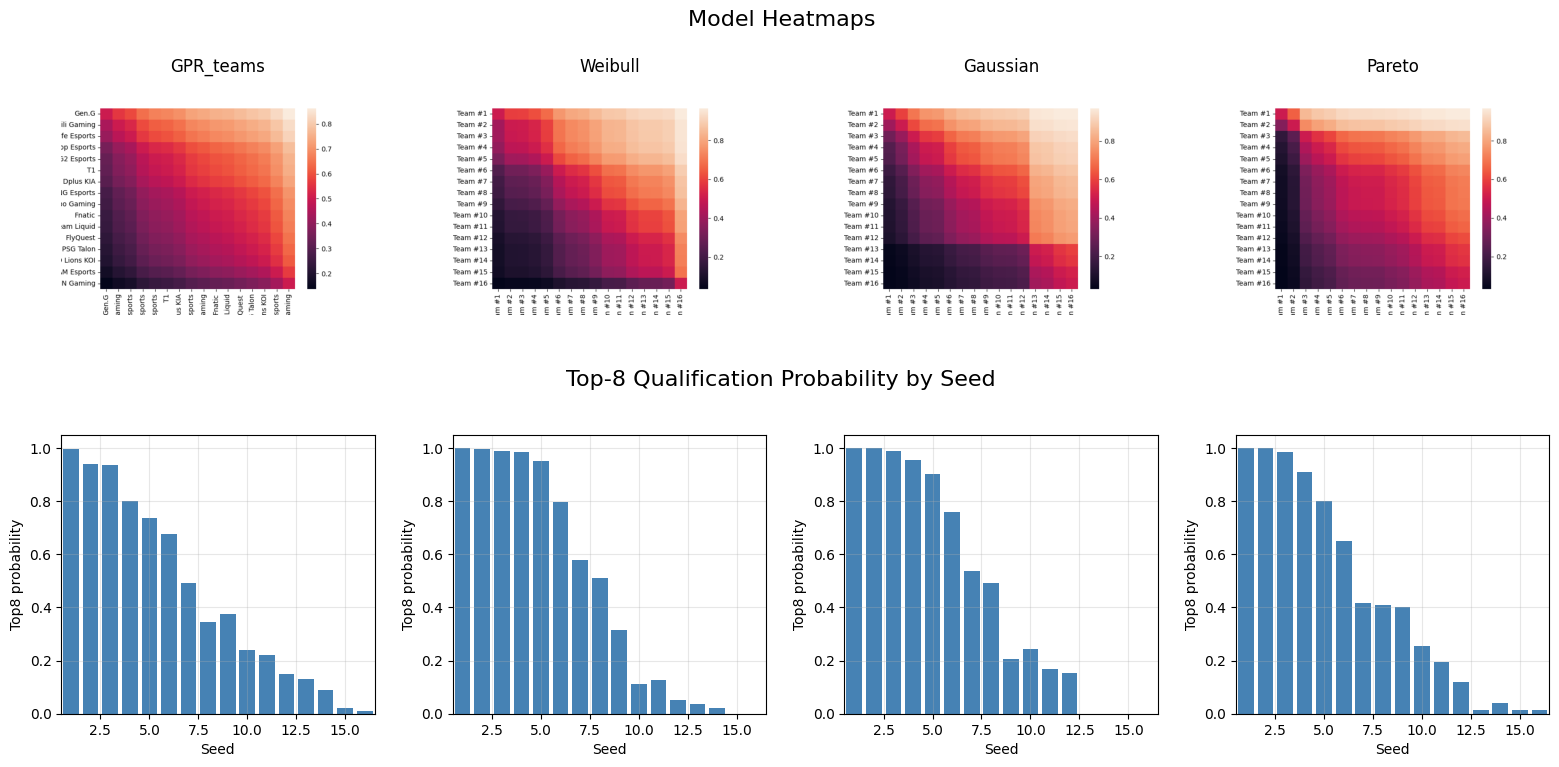

In [9]:
from simulation.baseline import load_population
from simulation.baseline import qualification_probabilities
from simulation.baseline import plot_model_prob

DATA_DIR = "simulation/population"

models = load_population(DATA_DIR)
models_probabilities = qualification_probabilities(models, 200)
plot_model_prob(models_probabilities)

## 3. Simulation

In [10]:
from rstt import LogSolver
from simulation.protocols import protocol

solvers = {'Logistic': LogSolver()}
seedings = {'CH': correct_halves, 'PM': prior_mid, 'POST': post_mid, 'RANDOM': random_seeds}
variants = {'Major': GrahamPittExample, 'SpeedMajor': GrahamPittSolution, 'SeedChord': SeededChord}

results, discard = protocol(variants, models, solvers, seedings)

## 4. Analysis

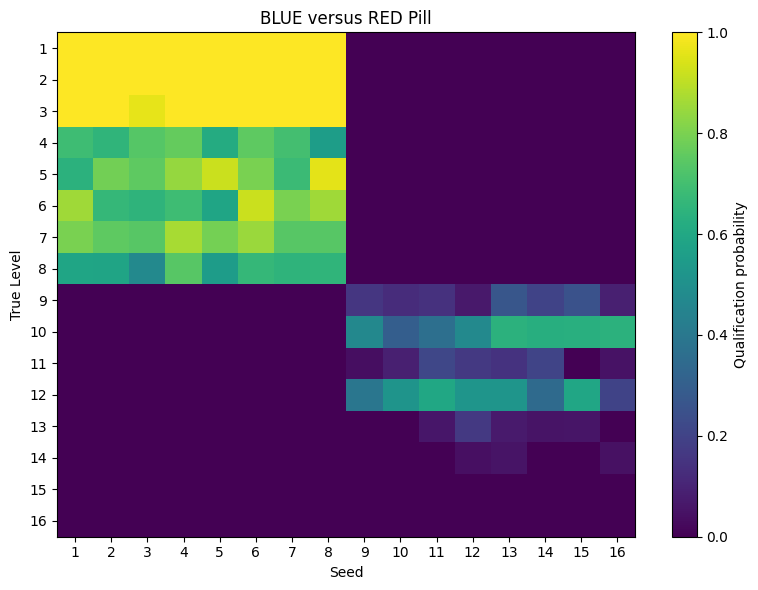

In [11]:
from rstt import Ranking

import matplotlib.pyplot as plt
import numpy as np

#from plot import blue_red_pill

def skills_seed_matrix(events: list[SwissBracket], gt: Ranking):
    qualifications = np.zeros((16, 16))  # rows = real level, cols = seed
    count = np.zeros((16, 16))

    for event in events:
        for p in gt:
            t = gt[p]
            s = event.seeding[p]
            count[t, s] += 1 # type: ignore
            if event.standing()[p] <= 8:
                qualifications[t, s] += 1 # type: ignore

    # avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        Q = qualifications / count
        Q[np.isnan(Q)] = 0.0 
        
    return Q

s = 'Logistic'
m = 'Gaussian'
sc = 'CH'
v = 'SpeedMajor'
events = results[v][s][m][sc].values()

Q = skills_seed_matrix(events, models[m])
n = Q.shape[0]

plt.figure(figsize=(8, 6))
im = plt.imshow(Q, cmap="viridis", origin="upper", aspect="auto")

plt.colorbar(im, label="Qualification probability")

plt.xticks(range(n), range(1, n+1))
plt.yticks(range(n), range(1, n+1))

plt.xlabel("Seed")
plt.ylabel("True Level")
plt.title('BLUE versus RED Pill')

# optional: show grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


### 4.2 Interactive Exploration

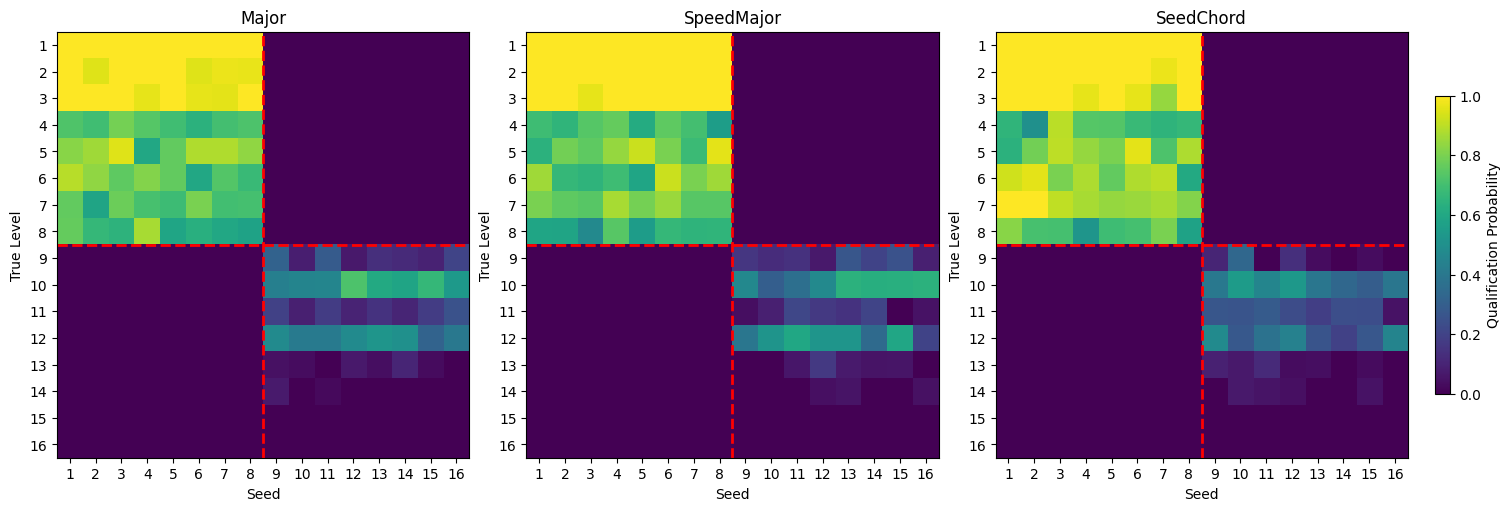

In [12]:
def plot_multiple_Q(v_list, results, s, m, sc, models):
    n = len(v_list)

    # grid size (automatic)
    cols = min(n, 4)
    rows = int(np.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
    axes = axes.ravel()

    for ax, v in zip(axes, v_list):
        events = results[v][s][m][sc].values()
        Q = skills_seed_matrix(events, models[m])

        im = ax.imshow(Q, cmap="viridis", origin="upper", aspect="auto")
        ax.set_title(f"{v}", fontsize=12)

        ax.set_xlabel("Seed")
        ax.set_ylabel("True Level")
        ax.set_xticks(range(16))
        ax.set_xticklabels(range(1, 17))
        ax.set_yticks(range(16))
        ax.set_yticklabels(range(1, 17))

        # Add huge cross at center
        mid = Q.shape[0] // 2
        ax.axhline(mid-0.5, color='red', linewidth=2, linestyle='--')
        ax.axvline(mid-0.5, color='red', linewidth=2, linestyle='--')

    # Hide unused axes
    for ax in axes[len(v_list):]:
        ax.axis("off")

    # One colorbar for the whole figure
    cbar = fig.colorbar(im, ax=axes, shrink=0.7, pad=0.02)
    cbar.set_label("Qualification Probability")

    plt.show()


plot_multiple_Q(variants.keys(), results, s, m , sc, models)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

v_options = list(results.keys())  # e.g., ["SpeedMajor", "Balance", ...]
s_options = list(results[v_options[0]].keys())  # strategies
m_options = list(models.keys())  # models
sc_options = list(results[v_options[0]][s_options[0]][m_options[0]].keys())  # scores

#v_widget = widgets.Dropdown(options=v_options, description='v:')
s_widget = widgets.Dropdown(options=s_options, description='Solver:')
m_widget = widgets.Dropdown(options=m_options, description='Team Model:')
sc_widget = widgets.Dropdown(options=sc_options, description='Seedings:')

ui = widgets.HBox([s_widget, m_widget, sc_widget])
out = widgets.interactive_output(plot_multiple_Q,
                                 {'v_list': widgets.fixed(variants),
                                  'results': widgets.fixed(results),
                                  's': s_widget,
                                  'm': m_widget,
                                  'sc': sc_widget,
                                  'models': widgets.fixed(models)})

display(ui, out)

Output()